In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 1000  # time points
M =   20  # channels
nMat = 20

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))
dataMat = np.zeros((nMat ,M, N))
# create the data
data = np.zeros((M,N))

for i in range(nMat):
    for mi in range(M):
        data[mi] = np.sin(t) * chanrel[mi]

    data = data + np.random.randn(M,N)
    dataMat[i] = data


In [3]:
dataMean = np.mean(dataMat,axis=0)
dataMeanCorrMat = np.corrcoef(dataMean)

In [4]:
dataCorrMat = np.zeros((nMat,M,M))

for i in range(nMat):
    dataCorrMat[i] = np.corrcoef(dataMat[i])

dataCorrMeanMat = np.mean(dataCorrMat, axis=0)


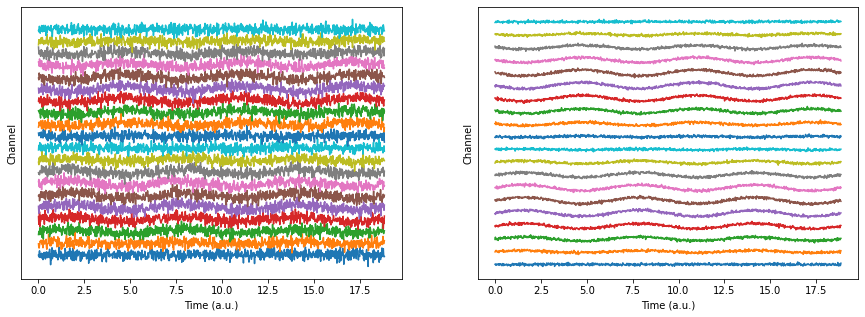

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

for i in range(M):
    ax[0].plot(t, dataMat[1,i,:]+i*4)
    
ax[0].set_yticks([])
ax[0].set_xlabel('Time (a.u.)')
ax[0].set_ylabel('Channel')

for i in range(M):
    ax[1].plot(t, dataMean[i,:]+i*4)
    
ax[1].set_yticks([])
ax[1].set_xlabel('Time (a.u.)')
ax[1].set_ylabel('Channel')
plt.show()

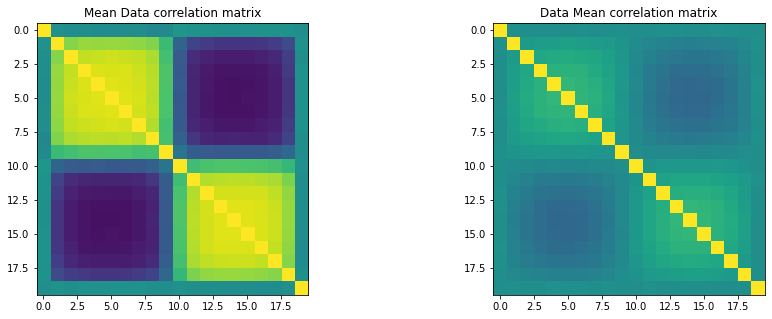

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].imshow(dataMeanCorrMat,vmin=-1,vmax=1)
ax[0].set_title('Mean Data correlation matrix')

ax[1].imshow(dataCorrMeanMat,vmin=-1,vmax=1)
ax[1].set_title('Data Mean correlation matrix')

plt.show()